In [132]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [134]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Wed Apr 22 17:01:59 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Wed Apr 22 17:02:00 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [135]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

train[['spam']]

,spam
7657,0
6911,0
6074,0
4376,0
5766,0
...,...
5734,0
5191,1
5390,0
860,0


Recall that you trained the following model in Part A.

In [136]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [137]:
#Ham gets flagged as spam 0->1
zero_predictor_fp = sum(Y_train & 0)
#Spam gets flagged as ham 1->0
zero_predictor_fn = sum(Y_train != 0)


In [138]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [139]:
zero_predictor_acc = (len(Y_train) - zero_predictor_fn)/ len(Y_train)
zero_predictor_recall = 0

zero_predictor_acc

0.7447091707706642

In [140]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

False Positives(is 0 but gets flagged as 1):
The zero_predictor created was to classify all the emails as ham (all 0's). Hence, there are no emails that are classified as spam (1's). 

False Negatives(is 1 but get flagged as 0): Comparing to Y_train, the zero_predictor classifies everything that isn't already a zero as a False Negative. Hence this number is all the values in out Y_train that is 0 (from the zero_predictor) but is 1 in Y_train. 

Accuracy: 0.7447091707706642 which is close to the accuracy of the model created 2A. TP+TN/(TP+TN+FP+FN). In this case its just the all the hams in Y_train over the entire dataset. In this case I subtacted Y_train from the zero_predictor_FN, which is the number of non-hams.  

Recall:0 because there are no True Positives with the zero_preictor (as it classifies everything as ham). 
So: 0/0+FN= 0

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [141]:
Y_train_hat = model.predict(X_train)
#class is 0 but predicted value is 1
FP=np.sum((Y_train!=Y_train_hat)[Y_train_hat==1])
TN=np.sum((Y_train_hat == Y_train)[Y_train_hat == 0])
#class is 1 but predicted value is 0
FN=np.sum((Y_train!=Y_train_hat)[Y_train_hat==0])

logistic_predictor_precision = np.sum((Y_train_hat == 1) & (Y_train == 1)) / np.sum(Y_train_hat)
logistic_predictor_recall = np.sum((Y_train_hat == 1) & (Y_train == 1)) / np.sum(Y_train)
logistic_predictor_far = FP/(FP+TN)


In [142]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

In [143]:
logistic_predictor_precision
logistic_predictor_recall

0.11418143899895725

FP:122
FN:1699

logistic_predictor_precision:0.6422287390029325
logistic_predictor_recall=0.11418143899895725

There are more False Negatives when using logistic regression on the given classifier. This can be seen in the precision which is far larger than the recall value. The smaller recall implies that there is less coverage of our model.  

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. Our zero predictor yielded is am accuracy of 0.7447091707706642, which is suprisingly very close, and just a little smaller than the logistic regression classifier. This is because the TP will never be predicted as our zero classifier always predicts 0, but it will predict the True Negatives.  

2. The words used to filter spam are not too effective in distinguishing between spam/ham. Spam words are typically persuasive. Memo, for example isn't, and so it would show up in fewer spam emails. As well as they are too general. Html tags, and '!' points are more used, and so it will be easier to identify spam/ham with these features. Since these words are not prevelant in most of the emails, our logistic classifier would not perform well. However, I realized that using too many html tags are redundant.

3. I'd prefer the zero-predictor as it yields a lower false-alarm rate, thus less FP and more FN. While the goal is to get rid of spam emails, to the user, it is safer to recieve a potential spam than lose a valid email. 

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

## Exploring the data with some data processing 

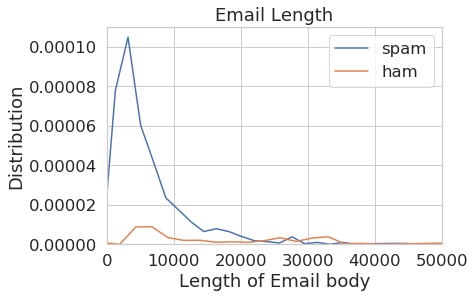

Text(0.5, 1.0, 'Subject Length')

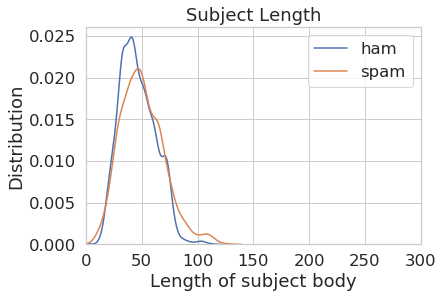

In [144]:
#intializing new df
df=train.copy().fillna("")

#using techniques from part 2a that worked well
df['email_len'] = df['email'].apply(len)
df['subject_len']=df['subject'].fillna('').apply(len)
df['type']=df['spam'].replace({0:'ham',1:'spam'})

x1=df[df['type']=='ham']
x2=df[df['type']=='spam']
x=x1['email_len']
y=x2['email_len']
x_lim = plt.xlim([0,50000])
sns.distplot(y,hist=False,label='spam')
sns.distplot(x,hist=False,label='ham')
plt.xlabel('Length of Email body')
plt.ylabel('Distribution')
plt.title('Email Length')
plt.show()

x1=df[df['type']=='ham']
x2=df[df['type']=='spam']
x_val=x1['subject_len']
y_val=x2['subject_len']
sns.distplot(x_val,hist=False,label='ham')
sns.distplot(y_val,hist=False,label='spam')
x_lim = plt.xlim([0,300])
plt.xlabel('Length of subject body')
plt.ylabel('Distribution')
plt.title('Subject Length')
#this made me realize that the length of the subject isn't too helpful:(

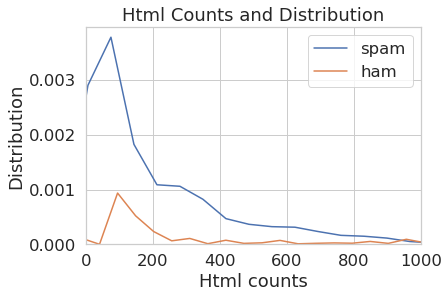

,id,subject,email,spam,email_len,subject_len,type,html_counts
7657,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0,1641,37,ham,55
6911,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0,4713,42,ham,98
6074,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0,1399,54,ham,49
4376,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0,4435,73,ham,127
5766,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0,32857,52,ham,1786
...,...,...,...,...,...,...,...,...
5734,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0,465,60,ham,16
5191,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1,7054,42,spam,222
5390,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0,1732,26,ham,45
860,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0,1098,52,ham,26


In [145]:
#Now finding the total amount of html tags 
df['html_counts']=df['email'].str.count('(html|<br>|\n|<body>|<center>|\\n|</tr>|=)')
x1=df[df['type']=='ham']
x2=df[df['type']=='spam']
x=x1['html_counts']
y=x2['html_counts']
x_lim = plt.xlim([0,1000])
sns.distplot(y,hist=False,label='spam')
sns.distplot(x,hist=False,label='ham')
plt.xlabel('Html counts')
plt.ylabel('Distribution')
plt.title('Html Counts and Distribution')
plt.show()

df


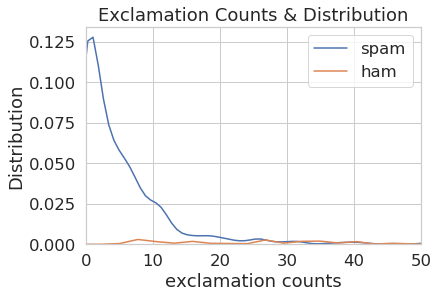

In [146]:
#Punctuation:

df['exclamation'] = train.email.str.count(r"!")

x1=df[df['type']=='ham']
x2=df[df['type']=='spam']
x=x1['exclamation']
y=x2['exclamation']
x_lim = plt.xlim([0,50])
sns.distplot(y,hist=False,label='spam')
sns.distplot(x,hist=False,label='ham')
plt.xlabel('exclamation counts')
plt.ylabel('Distribution')
plt.title('Exclamation Counts & Distribution')
plt.show()




In [147]:
#finding the most commonly used words in spam and ham
all_spam_emails=df[df['spam'] == 1]['email']
all_ham_emails=df[df['spam'] == 0]['email']

#intializing a lost which will split words
spam_words=[word for i in all_spam_emails for word in i.split()]
ham_words=[word for i in all_ham_emails for word in i.split()]

#intializing DF so can sort values more easily
df_spam=pd.DataFrame(spam_words, columns={'words'})
df_ham=pd.DataFrame(ham_words, columns={'words'})

#Examined the top 100 words
x=df_spam.words.value_counts().head(100)
y=df_ham.words.value_counts().head(100)


#Subject: 

#finding the most commonly used words in spam and ham
all_spam_subject=df[df['spam'] == 1]['subject']
all_ham_subject=df[df['spam'] == 0]['subject']

#intializing a lost which will split words
spam_words=[word for i in all_spam_subject for word in i.split()]
ham_words=[word for i in all_ham_subject for word in i.split()]

#intializing DF so can sort values more easily
df_spam=pd.DataFrame(spam_words, columns={'words'})
df_ham=pd.DataFrame(ham_words, columns={'words'})

#Examined the top 100 words
x=df_spam.words.value_counts().head(100)
y=df_ham.words.value_counts().head(100)

x.head(20)


Subject:    1918
for          151
Your         143
to           134
your         124
a            119
the          112
-            110
you          106
and           78
of            76
Free          75
ADV:          67
on            65
Re:           62
[ILUG]        62
in            54
&             54
The           53
!             49
Name: words, dtype: int64

In [148]:
y.head(20)


Subject:         5593
Re:              2651
the               565
[ILUG]            519
for               507
to                435
of                363
RE:               345
a                 290
on                277
in                276
[SAtalk]          251
[Razor-users]     244
and               236
[Spambayes]       228
The               214
with              214
[zzzzteana]       182
is                169
(was              140
Name: words, dtype: int64

## Data processing  

In [155]:

def data_proccessing(data):
    
    data=data.fillna('')
    
    #counts '!' 
    exclamation= data.email.str.count(r"!")
    df=pd.DataFrame({'exclamation':exclamation})
    
    #count subject !
    exclamation_subject= data.subject.fillna('').str.count(r"!")
    df=pd.concat([df,pd.DataFrame({'exclamation_subject':exclamation_subject})], axis=1)
    
    
    #count subject !
    carrot= data.email.fillna('').str.count(r">>|> >")
    df=pd.concat([df,pd.DataFrame({'carrot':carrot})], axis=1)
    
    
    #http_counts
    #http_counts= data.email.fillna('').str.count(r"http://")
    #df=pd.concat([df,pd.DataFrame({'http_counts':http_counts})], axis=1)
    
    
    #email len
    email_len = data.email.fillna('').apply(len)
    df=pd.concat([df,pd.DataFrame({'email_len':email_len})], axis=1)
        
    #subject len
   # subject_len=data.subject.fillna('').apply(len)
   # df=pd.concat([df,pd.DataFrame({'subject_len':subject_len})], axis=1)
    
    #html counts tags
    html_counts=data.email.fillna('').str.count('(html|\\|<br>|\n|<body>|<center>|\\n|</tr>|=)')
    df=pd.concat([df,pd.DataFrame({'html_counts':html_counts})], axis=1)
    
    #Looking at FE in subject
    fe = data.subject.str.count(r"(Fe:|FE:)")
    df=pd.concat([df,pd.DataFrame({'fe':fe})], axis=1)
    
    #Looking at RE in subject
    re = data.subject.str.count(r"(Re:|RE:)")
    df=pd.concat([df,pd.DataFrame({'re':re})], axis=1)
    
    #Words feature engineering email
    words_list=['time','yo','html','offer', "%",'please','1','href','all','year','click','value',"<head>",'date','were','on','in']
    email=data.email.fillna('').str.lower()
    words=words_in_texts(words_list, email)
    df= pd.concat([df, pd.DataFrame(words, columns=words_list)], axis=1)  

    
    #Words feature engineering subject
    words_list=['subject: ','re:', '-', 'you','free','!']
    subject=data.subject.fillna('').str.lower()
    words_subject=words_in_texts(words_list,subject)
    df= pd.concat([df, pd.DataFrame(words_subject, columns=words_list)], axis=1)  

    
    #Subject w.c 
    subject_word_count=[len(subject.split()) for subject in data.subject.fillna('')]
    df= pd.concat([df, pd.DataFrame( subject_word_count, columns=['subject_word_count'])], axis=1)  

    #email w.c
    email_word_count=[len(email.split()) for email in data.email]
    df= pd.concat([df, pd.DataFrame( email_word_count, columns=['email_word_count'])], axis=1)  
    
    #count dollar email
    subject_dollar = data.subject.fillna('').str.count(r"\$")
    df= pd.concat([df, pd.DataFrame({'subject_dollar': subject_dollar})], axis=1)  
    #count dollar subject
    email_dollar = data.email.fillna('').str.count(r"\$")
    df= pd.concat([df, pd.DataFrame({'email_dollar': email_dollar})], axis=1)  
    
    #cap ratio subject
    number_capital_subject =(data.subject.apply(lambda x:str(x)).str.count(r"[A-Z]")).fillna(0)
    subject_cap_ratio =(number_capital_subject/subject_word_count).fillna(0)
    df= pd.concat([df, pd.DataFrame({'subject_cap_ratio': subject_cap_ratio})], axis=1)  
    
    #capital subject
    number_capital_subject =(data.subject.apply(lambda x:str(x)).str.count(r"[A-Z]")).fillna(0)
    #subject_cap_ratio =(number_capital_subject/subject_word_count).fillna(0)
    df= pd.concat([df, pd.DataFrame({' number_capital_subject':  number_capital_subject})], axis=1)  
    
    
    #cap ratio email
    number_capital_email =(data.email.apply(lambda x:str(x)).str.count(r"[A-Z]")).fillna(0)
    email_cap_ratio =(number_capital_email/email_word_count).fillna(0)
    df= pd.concat([df, pd.DataFrame({'email_cap_ratio': email_cap_ratio})], axis=1)  
    
    number_capital_email =(data.email.apply(lambda x:str(x)).str.count(r"[A-Z]")).fillna(0)
    df= pd.concat([df, pd.DataFrame({'number_capital_email': number_capital_email})], axis=1)  
    
    return df




## Fitting the model

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

train=train.reset_index(drop=True).fillna('')
X_train=scale(data_proccessing(train))
Y_train=train.spam.to_numpy()
model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(X_train, Y_train)
training_accuracy= model.score(X_train,Y_train)

val=val.reset_index(drop=True).fillna('')
X_val=scale(data_proccessing(val))
Y_val=val.spam.to_numpy()
model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(X_val, Y_val)
val_accuracy= model.score(X_val,Y_val)


print( training_accuracy  , val_accuracy )

   

0.9231997870358046 0.9508982035928144


### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. Exploring the data before making my proccessing data function helped a lot. I took some of the recommended features and compared spam with ham. For example, I learned that the length of the email is a better feature than length of subject for example keeping in mind stop words.This helped when I built my data_proccessing function, and accuracy went up. Also, noticing html tags helped improve my model as well. I concentrated on turing html tags into features. As well as I was paying attention to the bias and variance trade off. 

2. I played a lot with the words list, and saw that some values that I originally found in the spam_words_list and ham_words_list, were innefective at changing the accuracies.I then removed them to prevent overfitting. I also searched for articals of the most commonly used spam trigger words. When I tried to fit in my model, it was also innefective.  Most of everything else which was recommended worked, but I had a hard a very hard time at creating the ratios. In general I kept on getting reoccuring values of null values existing within various parts of the code.As well as counting the "http" in all the email bodies didn't work.As well as a few other features I selected such as cap ratio 


3. Sometimes less is more. A lot of the features that I previously created only lowered my accuracy, even if I thought it was logical. It showed me that my biases from observing a single data set, can easily transer into my model creation. The val accuracy showed as much. Also I expected to see a lot more flashy words, which was my original plan of action, but the most useful features were involving punctuation or html. It made me learn that some words are too specific which would do little in improving my model, and the words that were most common were stop words, which majority of them are too general to distinguish  spam from ham. So overall, I was very suprised to learn that in searching for spam emails, words aren't the most useful at distinguishing. 








### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

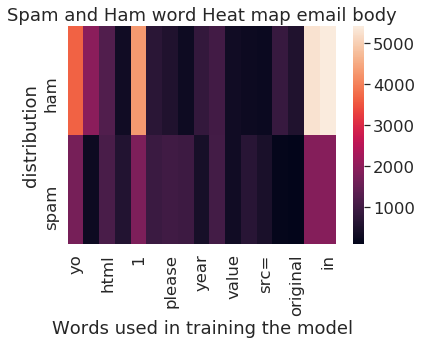

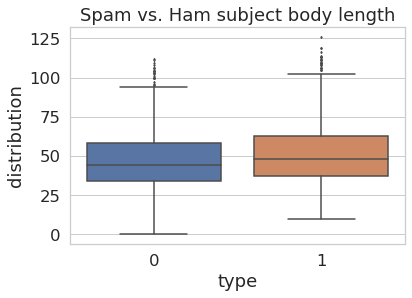

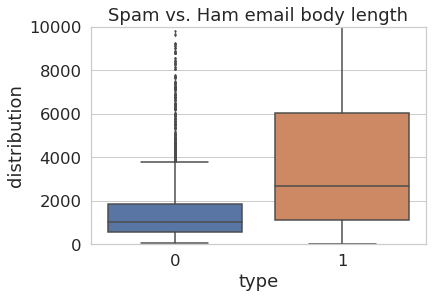

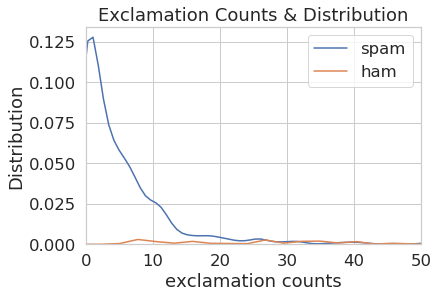

In [160]:
# Write your description (2-3 sentences) as a comment here:
# The hear plot visualizes which words are more distnict between spam/ham. 
# This was useful as I was able to switch out words that made little difference
# when I was selecting my features.
#the boxplots depict the distribution of lengths of subject and the length 
#of email bodies.This was particuliarly helpful as it made me realize that 
# the subject length only brought down my train accuracy score. By removing it
# I was able to increase my features accuracy. 
#Overall this helped me see that concentrating on other qualities 
#of the emails were a lot more helpful than picking words in my train set words
#count. 



# Write the code to generate your visualization here:
graph= pd.DataFrame({'type': train["spam"]})
words_list=['yo','date','html','offer', "1","%",'please','href','year','click','value',"<head>",'src=','were','original','on','in']
email=train.email.fillna('').str.lower()
words=words_in_texts(words_list, email)
graph= pd.concat([graph, pd.DataFrame(words, columns=words_list)], axis=1)  
graph
graph["type"] = graph["type"].replace({0: "ham", 1: "spam"})
graph
graph = graph.groupby("type").sum()
sns.heatmap(graph)
plt.title('Spam and Ham word Heat map email body')
plt.ylabel('distribution')
plt.xlabel('Words used in training the model')
plt.show()



#intializing new df
df=train.copy().fillna("")
df['email_len'] = df['email'].fillna('').apply(len)
df['subject_len']=df['subject'].fillna('').apply(len)
df['type']=df['spam'].replace({0:'ham',1:'spam'})
sns.boxplot(x="spam",y="subject_len",data=df,fliersize=1.6)
plt.title('Spam vs. Ham subject body length')
plt.ylabel('distribution')
plt.xlabel('type')
plt.show()      

sns.boxplot(x="spam",y="email_len",data=df,fliersize=1.6)
plt.ylim((0,10000))
plt.title('Spam vs. Ham email body length')
plt.ylabel('distribution')
plt.xlabel('type')
plt.show()      



df['exclamation'] = train.email.str.count(r"!")
x1=df[df['type']=='ham']
x2=df[df['type']=='spam']
x=x1['exclamation']
y=x2['exclamation']
x_lim = plt.xlim([0,50])
sns.distplot(y,hist=False,label='spam')
sns.distplot(x,hist=False,label='ham')
plt.xlabel('exclamation counts')
plt.ylabel('Distribution')
plt.title('Exclamation Counts & Distribution')
plt.show()

# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()


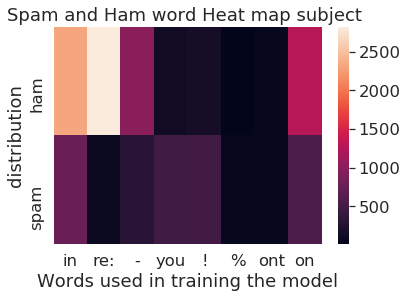

In [161]:
#This is to help me visualize my word choices for the subject line

graph= pd.DataFrame({'type': train["spam"]})
words_list=['in','re:', '-', 'you','!','%','ont','on']
subject=train.subject.fillna('').str.lower()
words=words_in_texts(words_list, subject)
graph= pd.concat([graph, pd.DataFrame(words, columns=words_list)], axis=1)  
graph["type"] = graph.replace({0: "ham", 1: "spam"})
graph = graph.groupby("type").sum()
sns.heatmap(graph)
plt.title('Spam and Ham word Heat map subject ')
plt.ylabel('distribution')
plt.xlabel('Words used in training the model')
plt.show()


# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [162]:
test
test=test.reset_index(drop=True).fillna('')
X_test=scale(data_proccessing(test))
Y_test_pred = model.predict(X_test)
test_predictions = model.predict(X_test)

In [163]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [164]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-29T23:49:12.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [165]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
This cell has a lot of content! Perhaps try to shorten your response. 



 # Write your description (2-3 sentences) as a comment here:
# The hear plot visualizes which words are more distnict between spam/ham. 
# This was useful as I was able to switch out words that made li
Saved proj2b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2b.ipynb'.
Submit... 100% complete
Submission successful for user: lubah@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj2b/submissions/kroxX5

